<a href="https://colab.research.google.com/github/pko89403/DeepLearningSelfStudy/blob/master/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%A8%B8%EB%A5%BC_%EC%9C%84%ED%95%9C_%EB%B2%A0%EC%9D%B4%EC%A7%80%EC%95%88_with_%ED%8C%8C%EC%9D%B4%EC%8D%AC_1%EB%8B%A8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

매주 수요일 저녁 먹고 7시 스터디
- 1장 - 강석우 ( 베이지안 모델을 만들고 훈련 시킨다 )
- 2장 - 김재화 님 ( 예제를 중심으로 PyMC를 사용해 모델을 만듬 )
- 3장 - 김동욱 님 ( 컴퓨터를 이용한 추론 뒤에 숨어있는 강력한 알고리즘 : MCMC )
- 4장 - 황중원 님 ( 추론에서 표본 크기와 관련된 이슈를 다시보고, 표본 크기를 이해하는 것이 왜 중요한지 )
- 5장 - 김성주 님 ( 손실 함수에 대해서 )
- 6장 - ??? ( 베이지안의 사전확률분포 )
- 7장 - 김수진 님 ( A/B 테스트 )

#  서론
확률 (Probability)는 불확실성을 수치로 표현하는 방법.        
통계학은  Error(오차)를 통제해서 우리가 알고싶어하는 특정한 Parameter(모수))를 추정하는 학문.         
통계학의 두 학파는 확률(불확실성)을 다르게 해석한다.
-  Frequentist (빈도주의)
-  Bayesian  (베이지안)


##   Frequentist ( 빈도주의  )
-  Aleatory Uncertainty ( 내재적 불확실성,  우연 )
- 불확실성이 미지의 고유한 변동성(RANDOMNESS)에  의해 존재
- 똑같은 사건이지만,  자연의 Randomness로 불확실성이 발생한다
- 많이 수행한 결과가 곧 확률이다.

##  Bayesian ( 베이지안 )
-  Epistemic Uncertainty ( 시스템적 불확실성  )
-  불확실성이 발생하는 이유는 우리가 지식이 없기 때문에 발생하는 것이다
-  측정이 정확하지 않거나,  특정한 Data가 포함되어야하는데 그렇지 않았다
-  사건에서 믿을 수 있는 정도,  사건의 발생을 얼마나 자신하는가?  로 확률을 본다



##  베이지안 심리  상태
베이지안은 직관적인 방법으로 접근한다.  확률을 사건  발생에 대한 확신의 척도로 해석한다.            
> 저 동전은 앞면이 위로가 있다
-  동전을 던진 A는 이미 앞면이란 걸 눈으로 확인했다.  (  100%  확률로 앞면이다.  )
-  자다가 전화 받은 B는 동전이 100원 짜린지 500원 짜린지도 모르지만, 어짜피 앞 뒤니까 (  50% 확률로 앞이다.  )

![""](https://t1.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/T7C/image/XTimnfJcI8i3WT4JPIaZYRHV6cw.jpg)
-  카지노의 6이 교묘하게 잘 안나오는 주사위
-  병원을 여러군데 가야하는 이유

진실의 일부만을 보는 일이 많기 때문에,  진실이라고 확신할 수 있게 만들어주는 증거를 수집해야한다.           
베이지안은 증거를 보고  믿음을 업데이트하는 방식을 사용한다. 그렇지 않으면 빈도주의자 처럼 사고해야한다.          
1.  특정 사건 A에 대한 우리의 믿음의 양을 P(A)로 표시한다.  ( Prior Probability, 사전확률 )
2. 증거 X가 주어진 상황에서 A의 확률,  업데이트 된 믿음을 P(A|X) ,  (  Posterior Probability, 사후확률 )이라고 한다.

우리의 추측이 잠재적으로 틀리다는 걸 인정하고,  데이터,  증거,  기타 정보를 관찰한 후 믿음을  업데이트해서 추측을 좀  더 정확하게 만든다.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib as mpl
from matplotlib import pyplot as plt


%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


###  1.2.1 .  예제 :  피해갈 수 없는 동전 던지기
![""]( https://t3.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/1oU7/image/kfkRLtVp5J9qGkcnXOtOjGNyQ8Y.png )
>  점점 더 많은 동전을 던지고 관측할 수록 p에 대한 우리의 추론은 어떻게 변하는가?

In [0]:
import numpy as np
import scipy.stats as stats

In [0]:
dist = stats.beta # 베타 확률 분포 객체를 선언
n_trials = [ 0, 1, 2, 3, 4, 5, 8, 15, 50, 500]  #  데이터를 관측할 시점 ex) 50개 500개를 던졌을 때  
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])  #  베르누이 확률 분포(사건은 두가지 중에서 무조건 하나만  나온다)의 랜덤 표본을 생성한다.
x = np.linspace(0, 1, 100) # 100 개의 점을 생성합니다. 점 사이의 간격은 ( 1 - 0 )/( 100 -1) 입니다. 

In [4]:
print(len(data))
data

500


array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
print(x)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

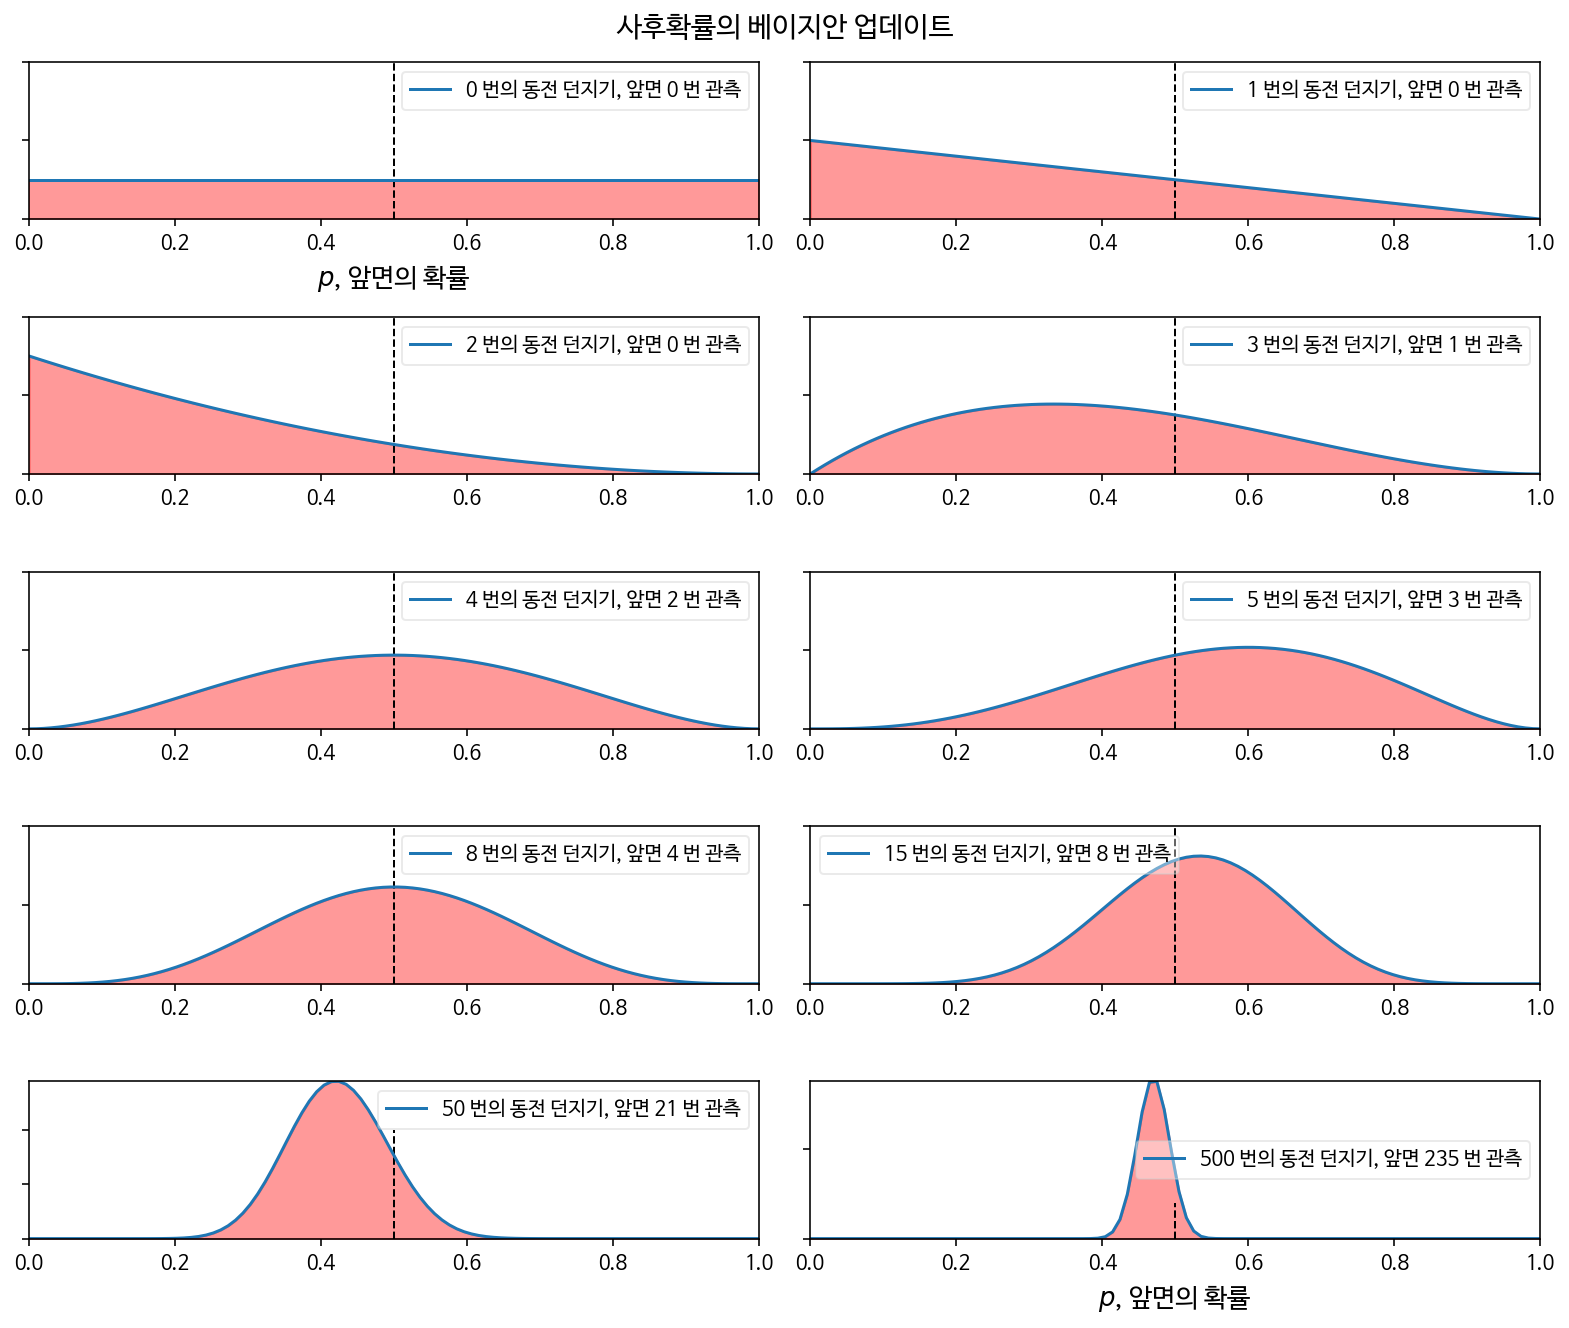

In [6]:
plt.figure(figsize=(11,9))
plt.rc('font', family='NanumBarunGothic') 
for k, N in enumerate(n_trials):  #  0  부터 500  번까지 시도를 했을 때,
  sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
  plt.xlabel("$p$, 앞면의 확률", fontsize=13) \
    if k in [0, len(n_trials) -1] else None
  plt.setp(sx.get_yticklabels(), visible=False)
  heads = data[:N].sum()  #  동전의 앞면이 관측된 횟수 . 
  y = dist.pdf(x, 1 + heads, 1 + N - heads)  #  pdf(x, loc=0, scale=1)

  plt.plot(x, y, label="%d 번의 동전 던지기, 앞면 %d 번 관측" % (N, heads))  #  사후확률은 곡선으로 표현된다.
  plt.fill_between(x, 0, y, color="red", alpha=0.4)  #  불확실성은 곡선의 너비에 비례한다.
  plt.vlines(0.5, 0, 4, color="k", linestyles='--', lw=1)

  leg = plt.legend()
  leg.get_frame().set_alpha(0.4)
  plt.autoscale(tight=True)

  plt.suptitle("사후확률의 베이지안 업데이트", y=1.02, fontsize=14)
  plt.tight_layout()

### 1.2.2.  예제 :  스티브는 사서일까,,  농부일까?

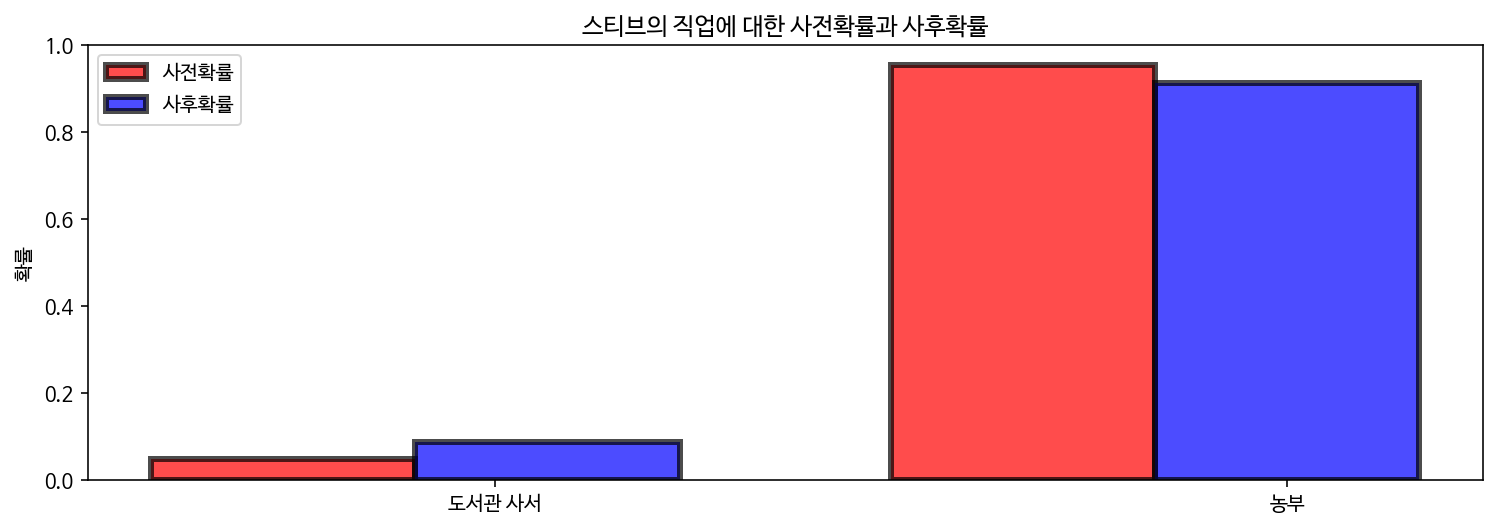

In [7]:
plt.figure(figsize=(12.5, 4))
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

colors = ["red", "blue"]
prior = [1/21., 20/21.] # 남자 농부와 남자 사서의 비율은 1:20 이다..사전확률은 알고 있다..
"""
P(A) (사전확률)은 1/21 = 0.047로 알고 있지만,  P(X|A)는 얼마일까?

스티브가 사서라고 가정했을 때,  이웃이 스티브를 사서라고 설명활 확률.  95%로 정한다. P(X|A)
스티브가 농부라고 가정했을 때,  이웃이 설명한 내용 X의 확률 0.5로 정한다.  P(X|~A)

P(X) ,  누군가가 이웃이 스티브를 설명한 대로 진술할 가능성  P(X|A)P(A) + P(X|~A)P(~A)
P(X) = P(X and A) + P(X and ~A) = (0.95 X 1/21 ) + (0.5 X 20/21) = 0.52

P(A|X) =  P(X|A)P(A) / P(X) = (0.95  / 0.047 ) / 0.52 = 0.087
"""
posterior = [0.087, 1-0.087]
plt.bar( [0, .7], prior, 
        alpha=0.70, width=0.25,
        color=colors[0], label="사전확률",
        lw="3", edgecolor="black")
plt.bar([0+0.25, .7+0.25], posterior, 
        alpha=0.70,
        width=0.25, color=colors[1],
        label="사후확률",
        lw="3", edgecolor="black")

plt.xticks([0.20, 0.95], ["도서관 사서", "농부"])
plt.title("스티브의 직업에 대한 사전확률과 사후확률")
plt.ylabel("확률")
plt.legend(loc="upper left")

## 1.3  확률 분포
Z를 random variable(확률 변수)라고 하자..  확률분포함수(probability distribution function)는 Z와 관련된 것으로 Z가 가지는 여러 결과에 확율을 부여한다.
-  Z가 이산적인 형태인 경우 :  이산확률변수는 특정한 값들의 목록에서 값을 취한다고 가정한다.  (  화폐,  등급,  투표 수 ),  값들이 띄엄띄엄  
-  Z가 연속적인 형태인 경우 :  연속확률변수는 임의적인 값을 가진다.  (  기온,  속도,  시간),  범위 내에 모든 실수 값  가능..
-  Z가 혼합된 경우 :  이산확률변수와 연속확률변수 모두에 확률을 부여한다,  보험금을 지급하지 않을 확률이 90%,  나머지 연속적인 공간에서 얼마 낼지 연속확률변수.

###  1.3.1  이산적인 경우 
Z가 이상적이라면 그 분포를 확률질량함수(mass)라고 한다.        
Z가 특정값 x를 취할 때 확률,  P(Z=x)를 나타낸다.
Poisson-Distribution은 가장 유용한 확률질량함수 라고 한다..

####  포아송 분포 
단위 시간 안에 어떤 사건이 몇 번 발생할 것인지 표현

!["포아송분포"](https://t1.daumcdn.net/cfile/tistory/2678953A55F6E33633)
정해진 시간 안에 어떤 사건이 일어날 횟수에 대한 기댓값이 람다 이다.        

람다(np  =  발생횟수 )는 분포의 모수이고 람다(np)는 분포 모양을 결정한다.          
포아송분포에서 람다는 양수다.  
-  람다를 늘리면 큰 값에 더 많은 확률을 부여하고
-  람다를 줄이면 작은 값에 더 많은 확률을 부여한다.
람다는 포아송분포의 density(밀도)를 나타낸다.        
-  하룻동안 발생하는 출생자 수
-  일정 주어진 생산 시간 동안 발생하는 불량  수 

포아송의 유용한 속성 한가지는 기댓값이 모수와 같다는 점이다.

####  모수  ( Population Parameter )
모집단의 특성을 나타내는 수치,  포아송의 경우에서의 모수는 
>  '단위 시간  또는 단위 공간에서의  사건의 평균 발생 횟수'  다.

Text(0.5, 1.0, '$\\lambda$값을 달리 하여 만든 푸아송 확률변수의 확률질량함수')

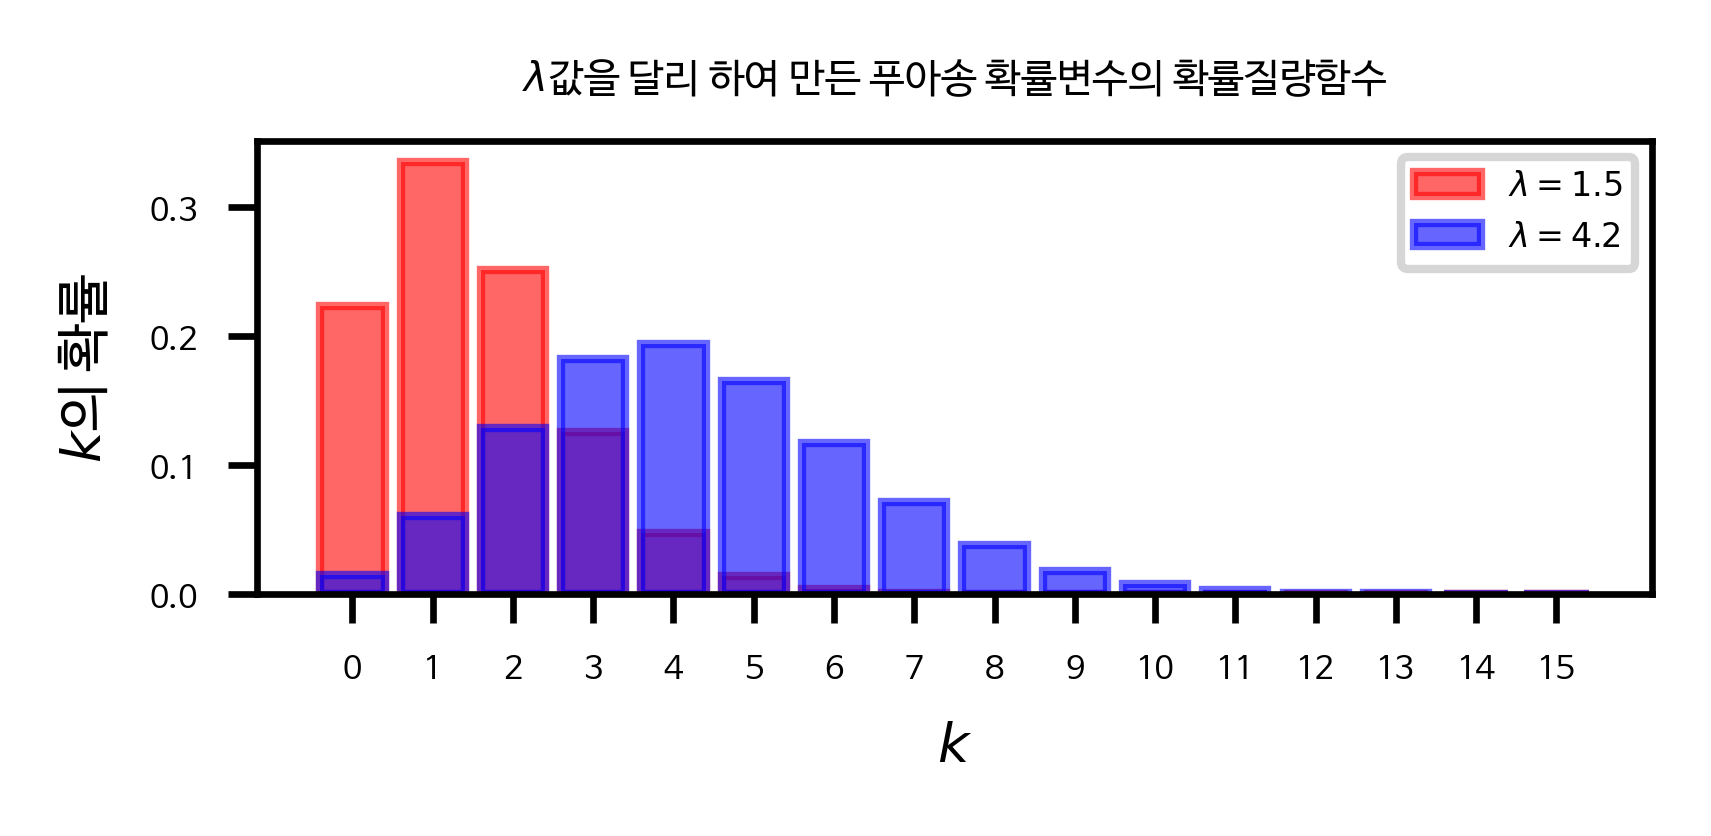

In [30]:
plt.rc('font', size=4)
plt.figure(figsize=(3, 1))
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["red", "blue"]

for i in range(2):
  plt.bar(a, poi.pmf(a, lambda_[i]), color=colours[i], label='$\lambda = %.1f$' % lambda_[i],
          alpha=0.60, edgecolor=colours[i], lw="1")
plt.xticks(a , a)
plt.legend()
plt.ylabel("$k$의 확률", fontsize=6.5)
plt.xlabel("$k$", fontsize=6.5)
plt.title("$\lambda$값을 달리 하여 만든 푸아송 확률변수의 확률질량함수")

###  1.3.2  연속적인 경우
연속확률변수는 확률질량함수 대신 확률밀도함수(Density)를 가진다.        
연속확률변수의 예는 지수밀도를 가진 확률변수다.  정수가 아닌 값을 포함해서      
음이 아닌 어떤 값이든 가질 수 있다..  정밀한 양의 변수일떄 확실한 선택이다.        


Text(0.5, 1.0, '여러 $\\lambda$값에 따른 지수확률변수의 확률밀도함수')

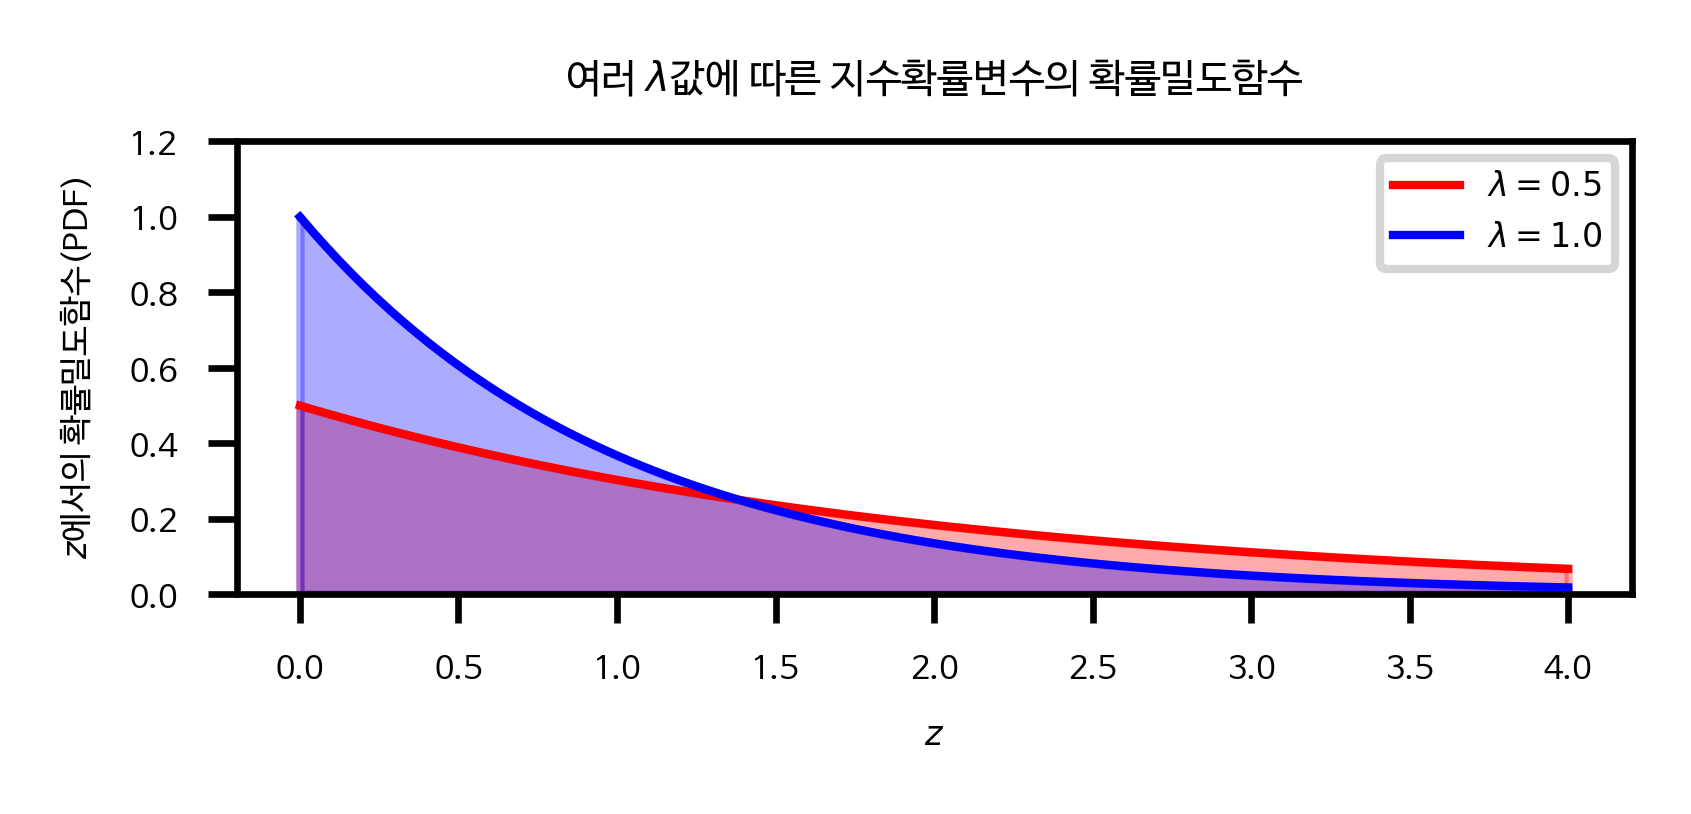

In [31]:
plt.rc('font', size=4)
plt.figure(figsize=(3, 1))
a = np.linspace(0, 4, 100)
expo = stats.expon 
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
  plt.plot(a, expo.pdf(a, scale=1. / l), lw=1, color=c, label="$\lambda = %.1f$" % l)
  plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("$z$에서의 확률밀도함수(PDF)", fontsize=4)
plt.xlabel("$z$",  fontsize=4)
plt.ylim(0, 1.2)
plt.title("여러 $\lambda$값에 따른 지수확률변수의 확률밀도함수")

###  리얼 월드에서는??
근데 실전에서는 우리는 정확한 람다를 모르고 우리는 분포만 가지고 있다.  ( 다리가 겁나 두꺼운데?  )         
사실은 고정  되어있는  람다(  코끼리 )를 정확하게 추측하기 보다.        
 람다에 확률분포를 부여해서 람다는 코끼리 인 것 같다고 만 얘기할수 있다..

##  컴퓨터를 사용하여 베이지안 추론하기
문자 메시지를 주고 받는 비율을 모델링하는 것이 목적입니다. (시간별)
저자의 문자 메시지 데이터. 

In [10]:
!wget "https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter1_Introduction/data/txtdata.csv" 

--2020-06-07 03:49:40--  https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter1_Introduction/data/txtdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1850 (1.8K) [text/plain]
Saving to: ‘txtdata.csv.1’

txtdata.csv.1       100%[===================>]   1.81K  --.-KB/s    in 0s      

2020-06-07 03:49:40 (31.7 MB/s) - ‘txtdata.csv.1’ saved [1850/1850]



(0.0, 74.0)

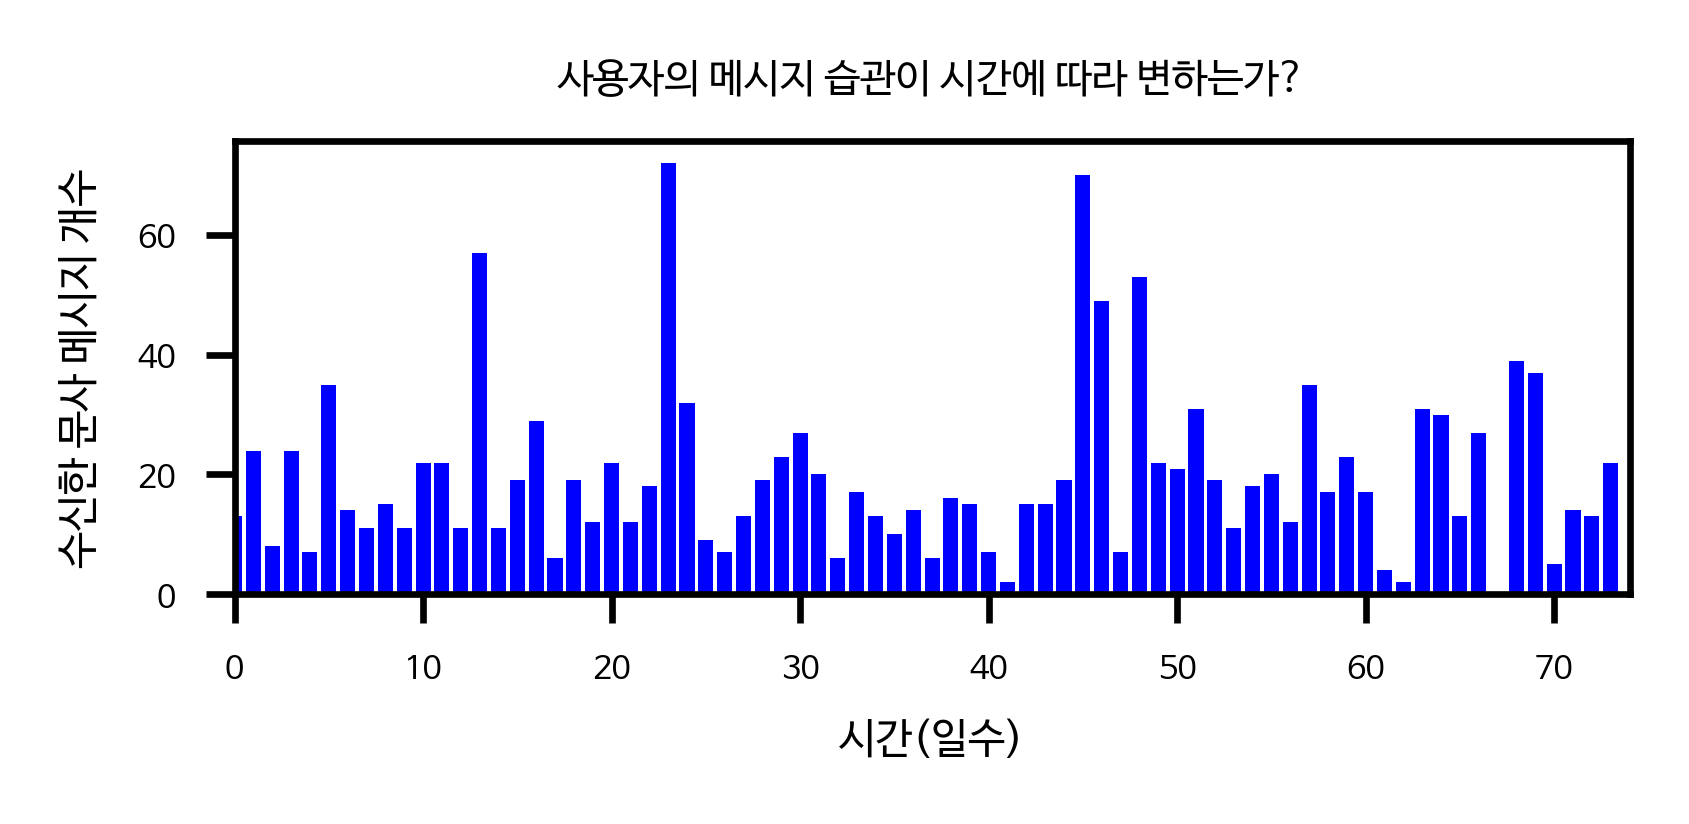

In [35]:
count_data = np.loadtxt(r"txtdata.csv")
n_count_data = len(count_data)

plt.rc('font', size=4)
plt.figure(figsize=(3, 1))
plt.bar(np.arange(n_count_data), count_data, color="blue")
plt.xlabel("시간(일수)", fontsize=5)
plt.ylabel("수신한 문사 메시지 개수", fontsize=5)
plt.title("사용자의 메시지 습관이 시간에 따라 변하는가?")
plt.xlim(0, n_count_data)

포아송 확률 변수 (  단위 시간내 어떤 사건 발생  횟수  )  는 특정 일자 i의 메시지 개수 $C_i$로 표시된다.        

$$C_i  \sim   Poi(\lambda)$$

근데 모수 $ \lambda $  는 실제로 무엇인지 모른다.        
뭐 거의 비슷해 보이는데 비율적으로 관측 막바지에 보면 메시지 개수가 늘어보인다.

>  관측 기간 중  어느 시점에서 $\lambda$가  증가한다는 의미  (  람다가 커질 수록 큰 결과에 더 많은 확률을 부여한다..  )

수학적으로 표현이 가능한데 관측 기간 중 어느날을 $\tau$라고 둔다.  타우를 기준으로 이전과 이후로 람다는 두개(  $\lambda_1, \lambda_2$  )가 된다.  이러한 변화를 공식적으로는 switchpoint(변환점)이라고 한다.    
베이지안   추론을 사용해서 람다를 추론하려면 lambda의 여러 가능한 값에 사전확률을 할당해야한다.        
두 람다에 대한 바람직한 **사전확률 분포**는
-  임의의 양수 여야한다.  (  문자 메시지 수 니까.  )

지수 분포는 양수에 대해 연속밀도함수를 제공  하므로 람다를 모델링 하기에 적합한 선택일수가 있다.       
하지만 지수 분포는 그 자체로 모수를 가지고 있다.       
 그래서 우리는 모델에 그 자체적인 모수를 포함시켜야한다.  그 모수를 $\alpha$라고 하자.


$\alpha$는 다른 모수에 영향을 주는 모수기 때문에 **hyperparameter** 또는 **parent variable**라고 한다.         
우리는 모델에서 이 모수 $\alpha$를 지나치게 고집하지 않는다.  알파를 **데이터 갯수 평균의 역수**가 되도록 설정한다.  **지수 분포**를  사용해서 람다를 모델링 하기 때문이다.
사전 확률을 너무 고정하지 않고,  초모수의 영향력을 최소화한다.
타우가 발생할 경우 데이터 노이즈 때문에 사전확률을 알아내기 힘들다.  대안으로 문자 메시지가 오는 모든 날에 **동일한 사전 확률**을 할당 할 수 있다..

##  PyMC
베이지안 분석 프로그래밍을 위한 파이썬 라이브러리다. PyMC를 사용해 이 문제를 모델링할 것인데 이런 류의 프로그래밍을  **확률적 프로그래밍**이라고 한다.
>  확률적 프로그래밍에서의 확률은  직접 만든 확률 모형이 프로그래밍 변수를 모델의 구성요소로 사용하고 있다는 점이다.

In [37]:
!pip install pymc

     |████████████████████████████████| 389kB 2.7MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp36-cp36m-linux_x86_64.whl size=1275931 sha256=bb71dd3f63cdb238554d137a973d67119b62904b66e62dc15df113751459606c
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc


In [43]:
import pymc as pm 
alpha = 1.0/count_data.mean() # 알파를 데이터 갯수 평균의 역수로 정한다.
lambda_1 = pm.Exponential("lambda_1", alpha) # 모델링 하기 위해 지수 함수를 사용한다.
lambda_2 = pm.Exponential("lambda_2", alpha)  #  PyMC의 확률론적 변수(Stochastic Variable)에 변수를 할당한다.

print(n_count_data)
tau  =  pm.DiscreteUniform("tau",  lower=0,  upper=n_count_data)  #  동일한 사전 확률을 할당한다..  

74


In [44]:
print("Random output:", tau.random(), tau.random(), tau.random())

Random output: 39 38 10


**lambda_**라는 새로운 함수를 아래와 같이 생성한다.     
함수에 필요한 파라미터 자체가 랜덤이므로 결과도 랜덤이 된다는 점에 주목해야한다.  고정된건 아직 없다..
**@pm.deterministic**          
은 PyMC에게 이것이 결정함수 라는 것을 알려주는 decorator다.  입력이 결정론적이면 결과도 결정론적이 된다.
>  결정함수는 측정  결과에 따라 다음의 처리 과정을 결정하는 함수 라는 뜻이다.


In [0]:
@pm.deterministic
def lambda_(tau=tau, lambd_1=lambda_1, lambda_2=lambda_2):
  out = np.zeros(n_count_data)
  out[:tau] = lambda_1 
  out[tau:] = lambda_2
  return out

**observation**  변수는 **value**키워드로 
-  cound_data
-  주어진 변수 lambda_
그리고 구상한 데이터 생성 스키마를 합쳐 얻은 것이다.  observed = True로 설정하여 PyMC에게 이 변수는 분석에서 고정되어야하는 것을 알려준다.

생성한 모든 변수를 모아 Model  인스턴스를 만든다.        
나중에 우리가 결과를 불러올 때 한층 일이 쉬워진다..        


In [0]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

아래에 사용하는 메커니즘은 **마르코프 체인  몬테카를로**    
Markov Chain Monte Carlo, MCMC     
$\lambda_1, \lambda_2~그리고~\tau$의 사후 확률  분포로 부터 수천 개의 확률  변수를 반환한다. (사후확률분포)

In [47]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

/usr/local/lib/python3.6/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 6.5 sec

Text(0, 0.5, '밀도')

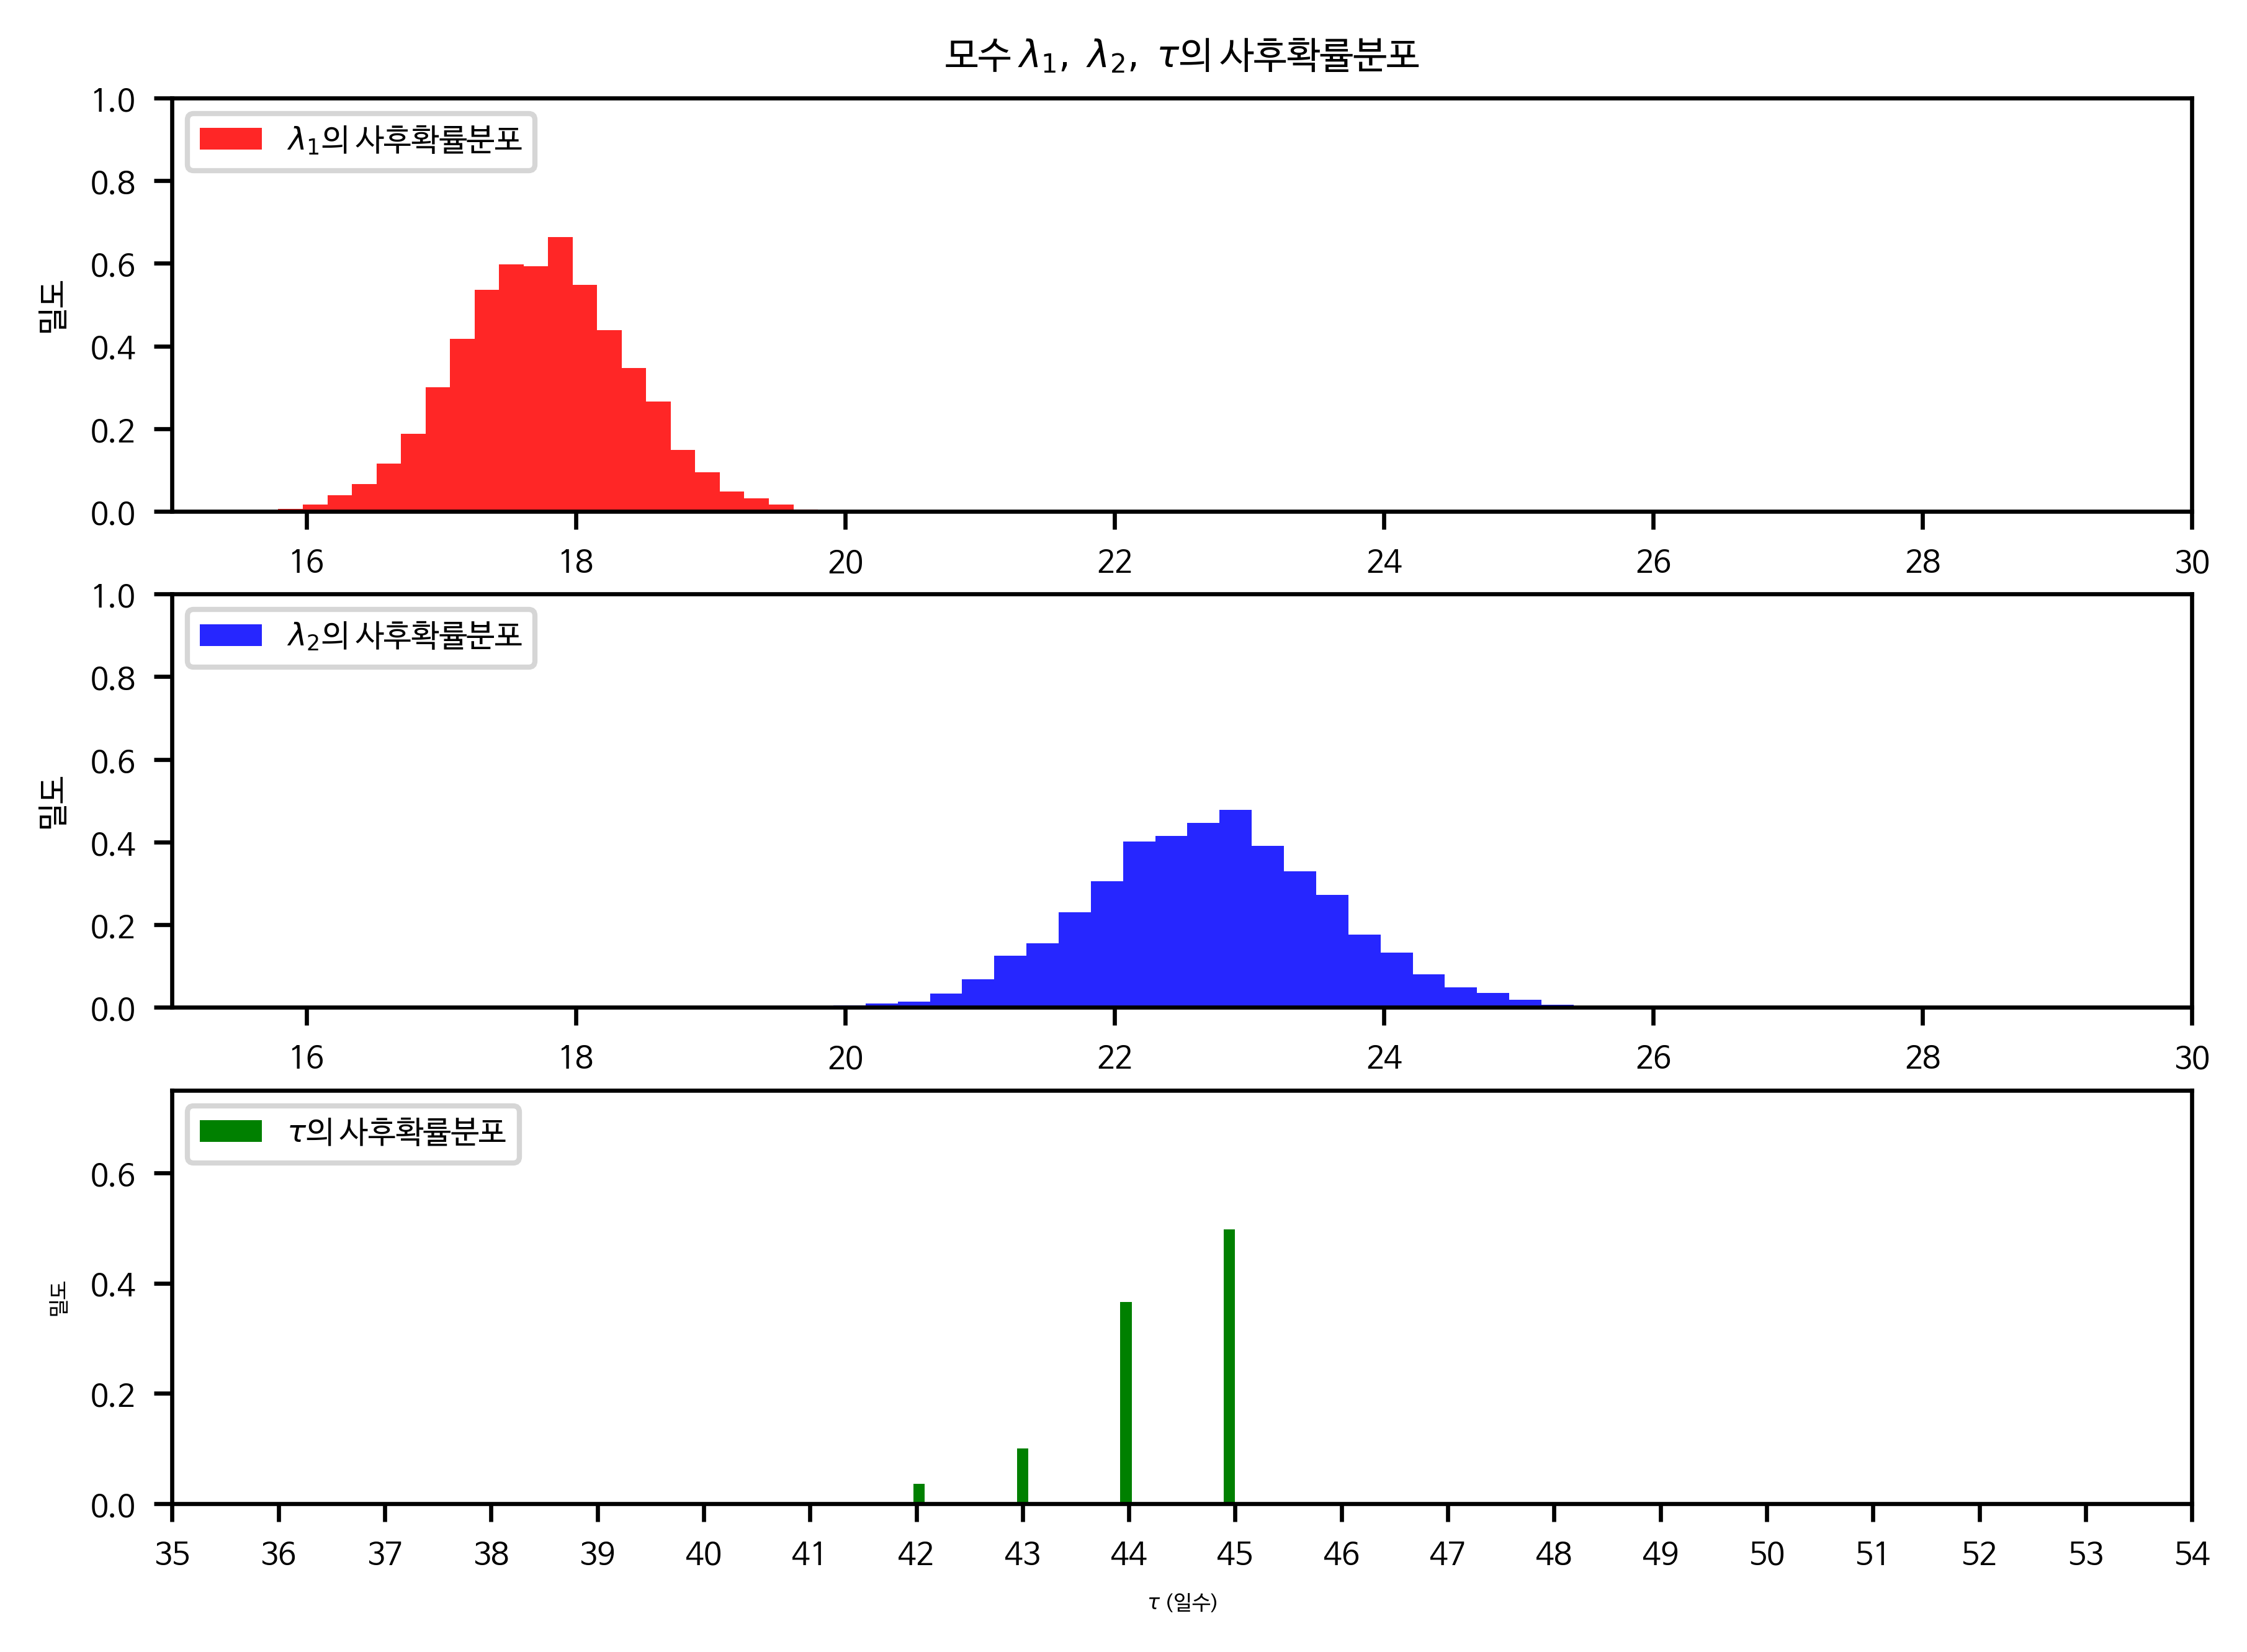

In [60]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

plt.rc('font', size=6)
plt.figure(figsize=(7, 5))

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_1$의 사후확률분포",  color="red", density=True)
plt.legend(loc="upper left")
plt.title(r"모수 $\lambda_1,\;\lambda_2,\;\tau$의 사후확률분포")
plt.xlim([15,30])
plt.xlabel("$\lambda_1$ 값", fontsize=6)
plt.ylabel("밀도",  fontsize=6)

ax  =  plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples,  histtype='stepfilled',  bins=30,  alpha=0.85,
         label="$\lambda_2$의 사후확률분포",  color="blue", density=True)
plt.legend(loc="upper left")
plt.xlim([15,30])
plt.xlabel("$\lambda_2$ 값",  fontsize=6)
plt.ylabel("밀도",  fontsize=6)

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1, label=r"$\tau$의 사후확률분포",  color="green", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (일수)",  fontsize=4)
plt.ylabel("밀도", fontsize=4)


### 해석
베이지안 방법론은 분포를 반환한다고 했다.  그래서 미지의 $\lambda$와  $\tau$를 표현할 분포를 가지게 되었다.          
분포가 넓다는 것은 사후 확률(믿음)이 확실하지 않다는 의미다.        
위의 그림을 보면 두 람다의 사후확률분포가 겹치지 않고 명확하게 구분된다..          
번수에 대한 사전확률분포가 지수적이라고 해도 람다에 대한 사후확률분포가 지수분포처럼 보이지 않는다.        
추가로 타우의 분포를 반환했다.  사후확률분포는 이산확률변수이므로 나머지 두개와 다르다.  구간에 확률을 부여하지는 않는다.         
아무 변화가 없거나 시간에 따라 점진적으로 변한다면 타우의 사후확률 분포는 더욱 넓게 퍼져 있을 것이고  정하기 애매해질 것이다.
 

###  사후확률분포에서 얻은 표본은?
우리는 사후확률분포 표본을 사용하여 질문에 답할 것이다. 
>  날짜 t (  0  <=  t <= 70)에서 문자 메세지 개수의 기댓값은 얼마인가?

>  포아송 변수의 기댓값은 그 분포의 모수 람다와 같다

[17.75176492 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492
 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492
 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492
 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492
 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492
 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492 17.75176492
 17.75176492 17.75202074 17.75202074 17.7524355  17.75345536 17.75650967
 17.91456012 18.37140154 20.1903891  22.71455428 22.71455428 22.71455428
 22.71455428 22.71455428 22.71455428 22.71455428 22.71455428 22.71455428
 22.71455428 22.71455428 22.71455428 22.71455428 22.71455428 22.71455428
 22.71455428 22.71455428 22.71455428 22.71455428 22.71455428 22.71455428
 22.71455428 22.71455428 22.71455428 22.71455428 22.71455428 22.71455428
 22.71455428 22.71455428]


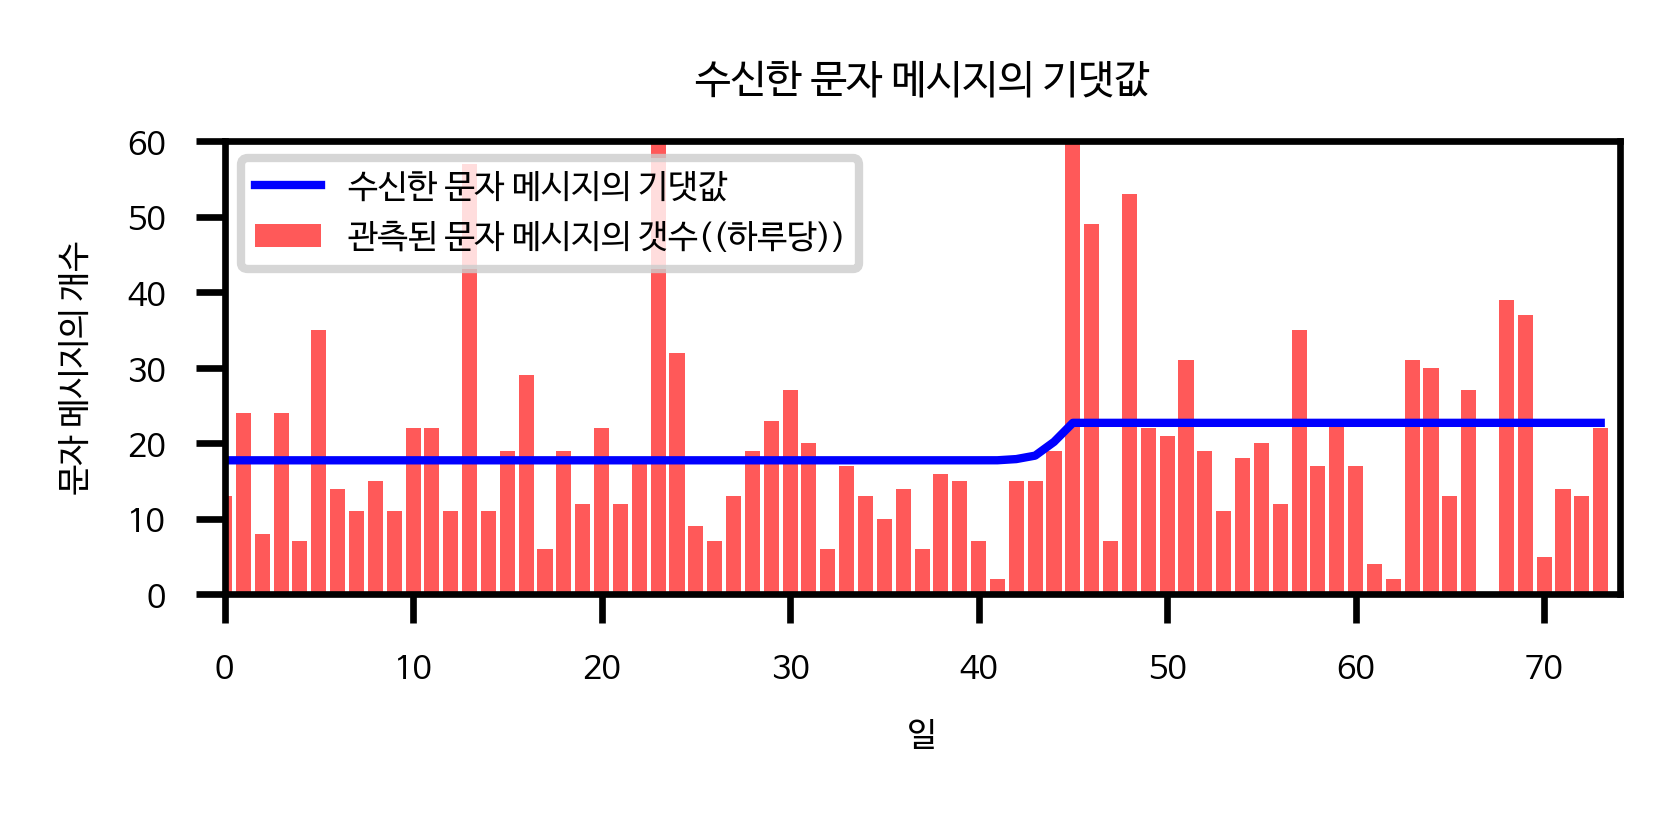

In [64]:
# tau_samples, lambda_1_samples, lambda_2_samples은
# 해당 사후확률분포에서 얻은 표본 N개가 포함된다..
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data) # 데이터 포인트 수 

for day in range(0, n_count_data):
  # ix는 'day'  값 이전에 발생한 변환점에 해당하는
  #  모든 tau  표본의 불(boolean)  인덱스다..
  ix = day < tau_samples
  
  # 각 사후확률분포의 표본은 tau  값에 해당한다.  tau  값은 변환점 이전인지(lambda_1)
  # 이후인지 (lambda_2)를 가리킨다..
  #  lambda_1 lambda_2의 사후확률 분포의 표본을 취함으로써 우리는 모든 표본을 평균하여 그날의
  #  lambda  기댓값을 얻을 수 있다.
  #  설명한 바와 같이 문자 메시지 개수 확률변수는 포아송분포를 따른다.
  #  그러므로 lambda(포아송 모수)는 메시지 개수의 기댓값이다.
  expected_texts_per_day[day] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / N

plt.rc('font', size=4)
plt.figure(figsize=(3, 1))
plt.plot(range(n_count_data), expected_texts_per_day, lw=1, color="blue", label="수신한 문자 메시지의 기댓값")
plt.xlim(0, n_count_data)
plt.xlabel("일",  fontsize=4)
plt.ylabel("문자 메시지의 개수",  fontsize=4)
plt.title("수신한 문자 메시지의 기댓값")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="red", alpha=0.65, label="관측된 문자 메시지의 갯수((하루당))")
plt.legend(loc="upper left")
print(expected_texts_per_day)